In [23]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [24]:
load_dotenv
llm =ChatOpenAI()

In [25]:
class JokesState(TypedDict):
    topic : str
    joke : str
    explanation : str

In [26]:
def generate_joke(state:JokesState):
    prompt = f"generate a joke on t he topic {state["topic"]}"
    response = llm.invoke(prompt).content
    return {'joke': response}

In [27]:
def generate_explianation(state:JokesState):
    prompt = f'write explaination of the joke - {state['joke']}'
    response =  llm.invoke(prompt).content

    return {'explanation': response}

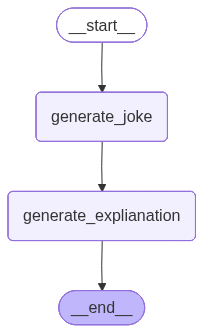

In [28]:
graph = StateGraph(JokesState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explianation',generate_explianation)

#edges
graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explianation')
graph.add_edge('generate_explianation',END)

checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [29]:
config2 = {"configurable" : {"thread_id" :"2"}} # need to assign the thread to store
workflow.invoke({'topic' :'pizza'}, config=config2)

{'topic': 'pizza',
 'joke': 'Why did the slice of pizza go to the party? Because it wanted to be the supreme ruler of the toppings!',
 'explanation': 'This joke is a play on words, using the term "supreme" in two different contexts. In this joke, "supreme" is a popular type of pizza that has a variety of toppings such as pepperoni, sausage, onions, peppers, and mushrooms. By saying the slice of pizza wanted to be the "supreme ruler of the toppings," it is a humorous way of saying that the pizza slice wanted to be the most powerful or dominant topping at the party. It combines the concept of pizza toppings with the idea of being in charge or ruling over the other toppings.'}

In [30]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the slice of pizza go to the party? Because it wanted to be the supreme ruler of the toppings!', 'explanation': 'This joke is a play on words, using the term "supreme" in two different contexts. In this joke, "supreme" is a popular type of pizza that has a variety of toppings such as pepperoni, sausage, onions, peppers, and mushrooms. By saying the slice of pizza wanted to be the "supreme ruler of the toppings," it is a humorous way of saying that the pizza slice wanted to be the most powerful or dominant topping at the party. It combines the concept of pizza toppings with the idea of being in charge or ruling over the other toppings.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f1040fc-9dbc-6b6a-8002-c0a2f1369288'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-07T10:28:48.284130+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_n

In [31]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the slice of pizza go to the party? Because it wanted to be the supreme ruler of the toppings!', 'explanation': 'This joke is a play on words, using the term "supreme" in two different contexts. In this joke, "supreme" is a popular type of pizza that has a variety of toppings such as pepperoni, sausage, onions, peppers, and mushrooms. By saying the slice of pizza wanted to be the "supreme ruler of the toppings," it is a humorous way of saying that the pizza slice wanted to be the most powerful or dominant topping at the party. It combines the concept of pizza toppings with the idea of being in charge or ruling over the other toppings.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f1040fc-9dbc-6b6a-8002-c0a2f1369288'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-07T10:28:48.284130+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_

In [33]:
config3 = {"configurable" : {"thread_id" :"3"}} # need to assign the thread to store
workflow.invoke({'topic' :'pasta'}, config=config3)
workflow.get_state(config3)
list(workflow.get_state_history(config3))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta chef break up with his girlfriend? Because she was always "al dente" about everything!', 'explanation': 'This joke plays on the term "al dente," which is used to describe pasta that is cooked to be firm to the bite. In the joke, the pasta chef broke up with his girlfriend because she was always "al dente" about everything, meaning she was always too firm or unyielding in her opinions or actions. The humor comes from the pun on the cooking term "al dente" and its application to a person\'s behavior.'}, next=(), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f1040ff-ff02-669c-8002-f121cf342620'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-07T10:30:19.014491+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f1040ff-e884-6820-8001-0b120e0aeccb'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pa

# Time travel


In [34]:
workflow.get_state({"configurable": {"thread_id": "2", "checkpoint_id": "1f1040fc-7c52-67f4-8000-ccf6abe3b703"}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f1040fc-7c52-67f4-8000-ccf6abe3b703'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-02-07T10:28:44.780321+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f1040fc-7c50-6f62-bfff-3a3b4ed1719d'}}, tasks=(PregelTask(id='167b9f1f-5754-2248-3758-ffa9b089d1ee', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the slice of pizza go to the party? Because it wanted to be the supreme ruler of the toppings!'}),), interrupts=())

In [35]:
workflow.invoke(None,{"configurable": {"thread_id": "2", "checkpoint_id": "1f1040fc-7c52-67f4-8000-ccf6abe3b703"}})

{'topic': 'pizza',
 'joke': 'Why did the mushroom go to the pizza party? \n\nBecause he was a fungi and everyone else was just too cheesy!',
 'explanation': 'This joke plays on the words "fun guy" (fungi) and "cheesy." In this context, the mushroom is referred to as a "fun guy" because of the pun on the word "fungi," which is the type of organism mushrooms belong to. The joke implies that the mushroom attended the pizza party because he was a fun and interesting guy, while everyone else was perceived as being too cheesy (meaning they were corny or unoriginal). The humor comes from the clever wordplay and the unexpected twist of why the mushroom chose to attend the party.'}

In [36]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the mushroom go to the pizza party? \n\nBecause he was a fungi and everyone else was just too cheesy!', 'explanation': 'This joke plays on the words "fun guy" (fungi) and "cheesy." In this context, the mushroom is referred to as a "fun guy" because of the pun on the word "fungi," which is the type of organism mushrooms belong to. The joke implies that the mushroom attended the pizza party because he was a fun and interesting guy, while everyone else was perceived as being too cheesy (meaning they were corny or unoriginal). The humor comes from the clever wordplay and the unexpected twist of why the mushroom chose to attend the party.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f104132-0e63-6dca-8002-3c48735e8737'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-07T10:52:42.804549+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_n

# updating State

In [37]:
workflow.update_state({"configurable": {"thread_id": "2", "checkpoint_id": "1f1040fc-7c52-67f4-8000-ccf6abe3b703", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f10413a-fbfe-62b2-8001-1db6c78720e9'}}

In [38]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f10413a-fbfe-62b2-8001-1db6c78720e9'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-02-07T10:56:42.467368+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f1040fc-7c52-67f4-8000-ccf6abe3b703'}}, tasks=(PregelTask(id='aaab7793-eb9b-6d58-46ff-c0d8edfc3651', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the mushroom go to the pizza party? \n\nBecause he was a fungi and everyone else was just too cheesy!', 'explanation': 'This joke plays on the words "fun guy" (fungi) and "cheesy." In this context, the mushroom is referred to as a "fun guy" because of the pun on the word "fungi," which is the type of organism mushrooms b

In [40]:
workflow.invoke(None,{"configurable": {"thread_id": "2", "checkpoint_id": "1f10413a-fbfe-62b2-8001-1db6c78720e9"}})

{'topic': 'samosa',
 'joke': "Why did the samosa break up with the burrito?\nBecause it couldn't handle the spicy competition!",
 'explanation': 'This joke plays on the idea of a samosa and a burrito being in a relationship, which is obviously a humorous concept. The punchline, "Because it couldn\'t handle the spicy competition," is a play on words. In this context, "spicy competition" refers to both the literal spiciness of the food (samosas and burritos are often spicy dishes) as well as the idea that there was competition between the two foods for the affection of the samosa. The humor comes from the unexpected twist in the joke and the clever wordplay.'}

In [41]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa', 'joke': "Why did the samosa break up with the burrito?\nBecause it couldn't handle the spicy competition!", 'explanation': 'This joke plays on the idea of a samosa and a burrito being in a relationship, which is obviously a humorous concept. The punchline, "Because it couldn\'t handle the spicy competition," is a play on words. In this context, "spicy competition" refers to both the literal spiciness of the food (samosas and burritos are often spicy dishes) as well as the idea that there was competition between the two foods for the affection of the samosa. The humor comes from the unexpected twist in the joke and the clever wordplay.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f10413e-b7e1-6710-8003-fa56bee32d1c'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-02-07T10:58:22.699466+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkp

# Fault Tolerant

In [42]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [43]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [44]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [45]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [46]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [47]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


KeyboardInterrupt: 

In [48]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f104143-acb0-65a8-8001-1e3c61ac0b85'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-02-07T11:00:35.743667+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f104143-acad-6efc-8000-cd9958694513'}}, tasks=(PregelTask(id='423370e4-850a-ff34-54ed-fceb63a0fffb', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f104143-acad-6efc-8000-cd9958694513'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-02-07T11:00:35.742664+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch